In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Import del módulo de donde se descargan los datos y se extrae.
from modules import data_download_extraction

In [3]:
#Descarga y extracción de archivos csv.
data_download_extraction.download_data('./links/eastern_states_links.csv', './')
data_download_extraction.download_data('./links/western_states_links.csv', './')
data_download_extraction.unzip_data('./data/')

Extracting Minnesota.zip:   0%|          | 0/108 [00:00<?, ?it/s]

Files from Alabama already exists.
Files from Arkansas already exists.
Files from Connecticut already exists.
Files from Delaware already exists.
Files from Florida already exists.
Files from Georgia already exists.
Files from Illinois already exists.
Files from Indiana already exists.
Files from Iowa already exists.
Files from Kansas already exists.
Files from Kentucky already exists.
Files from Louisiana already exists.
Files from Maine already exists.
Files from Maryland already exists.
Files from Massachusetts already exists.
Files from Michigan already exists.
Files from Minnesota already exists.
Files from Mississippi already exists.
Files from Missouri already exists.
Files from Montana already exists.
Files from Nebraska already exists.
Files from New Hampshire already exists.
Files from New Jersey already exists.
Files from New Mexico already exists.
Files from New York already exists.
Files from North Carolina already exists.
Files from Ohio already exists.
Files from Oklahom

Extracting Georgia.zip: 100%|██████████| 996/996 [00:07<00:00, 137.76it/s]


In [3]:
#Creación de los dataframes con los datos. Se generan archivos csv.
data_UPV = data_download_extraction.info_df_from_data('./data/Extracted/', tech = 'UPV')
data_DPV = data_download_extraction.info_df_from_data('./data/Extracted/', tech = 'DPV')
data_UPV.to_csv('./data_UPV.csv', index = False)
data_DPV.to_csv('./data_DPV.csv', index = False)

In [125]:
#Si los archivos con datos geograficos ya están construidos solo se leen
data_UPV = pd.read_csv('data_UPV.csv')
data_DPV = pd.read_csv('data_DPV.csv')

In [4]:
data_DPV.head()

,Latitude,Longitude,Power (MW),Technology,File_name
0,38.75,-76.85,33,DPV,Actual_38.75_-76.85_2006_DPV_33MW_5_Min.csv
1,32.25,-90.35,37,DPV,Actual_32.25_-90.35_2006_DPV_37MW_5_Min.csv
2,35.95,-78.55,37,DPV,Actual_35.95_-78.55_2006_DPV_37MW_5_Min.csv
3,31.95,-80.95,33,DPV,Actual_31.95_-80.95_2006_DPV_33MW_5_Min.csv
4,41.55,-87.35,31,DPV,Actual_41.55_-87.35_2006_DPV_31MW_5_Min.csv


In [5]:
#Definición de la región geográfica que delimita la región de las plantas.
BBox = (-125.00, -66.00, 24.20, 49.50)

In [6]:
import sys
!{sys.executable} -m pip install descartes

In [7]:
!{sys.executable} -m pip install geopandas

In [8]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [10]:
#Descarga y extracción de archivos shape del mapa de EEUU.
import urllib.request
import zipfile

url = 'https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_nation_5m.zip'
urllib.request.urlretrieve(url, './usa_shape.zip')
url = 'https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip'
urllib.request.urlretrieve(url, './usa_shape_division.zip')
url = 'https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_county_500k.zip'
urllib.request.urlretrieve(url, './usa_shape_countys.zip')

with zipfile.ZipFile('./usa_shape.zip', 'r') as zip_ref:
    zip_ref.extractall('./usa_shape/')
with zipfile.ZipFile('./usa_shape_division.zip', 'r') as zip_ref:
    zip_ref.extractall('./usa_shape_division/')
with zipfile.ZipFile('./usa_shape_countys.zip', 'r') as zip_ref:
    zip_ref.extractall('./usa_shape_countys/')

In [11]:
#Lectura de archivo shape para generación del mapa.

#usa_map = gpd.read_file('./usa_shape/cb_2018_us_nation_5m.shp')
#usa_map = gpd.read_file('./usa_shape_countys/cb_2018_us_county_500k.shp')
usa_map = gpd.read_file('./usa_shape_division/cb_2018_us_state_500k.shp')

In [12]:
#Creación de puntos geográficos a partir del dataframe.
geometry_UPV = [Point(xy) for xy in zip(data_UPV.Longitude.values.astype('float64'),data_UPV.Latitude.values.astype('float64'))]
geometry_DPV = [Point(xy) for xy in zip(data_DPV.Longitude.values.astype('float64'),data_DPV.Latitude.values.astype('float64'))]

#Creación de los geodataframes considerando los puntos.
geo_data_UPV = gpd.GeoDataFrame(data_UPV, crs = 'crs', geometry = geometry_UPV)
geo_data_DPV = gpd.GeoDataFrame(data_DPV, crs = 'crs', geometry = geometry_DPV)

In [13]:
geo_data_DPV.head()

,Latitude,Longitude,Power (MW),Technology,File_name,geometry
0,38.75,-76.85,33,DPV,Actual_38.75_-76.85_2006_DPV_33MW_5_Min.csv,POINT (-76.85000 38.75000)
1,32.25,-90.35,37,DPV,Actual_32.25_-90.35_2006_DPV_37MW_5_Min.csv,POINT (-90.35000 32.25000)
2,35.95,-78.55,37,DPV,Actual_35.95_-78.55_2006_DPV_37MW_5_Min.csv,POINT (-78.55000 35.95000)
3,31.95,-80.95,33,DPV,Actual_31.95_-80.95_2006_DPV_33MW_5_Min.csv,POINT (-80.95000 31.95000)
4,41.55,-87.35,31,DPV,Actual_41.55_-87.35_2006_DPV_31MW_5_Min.csv,POINT (-87.35000 41.55000)


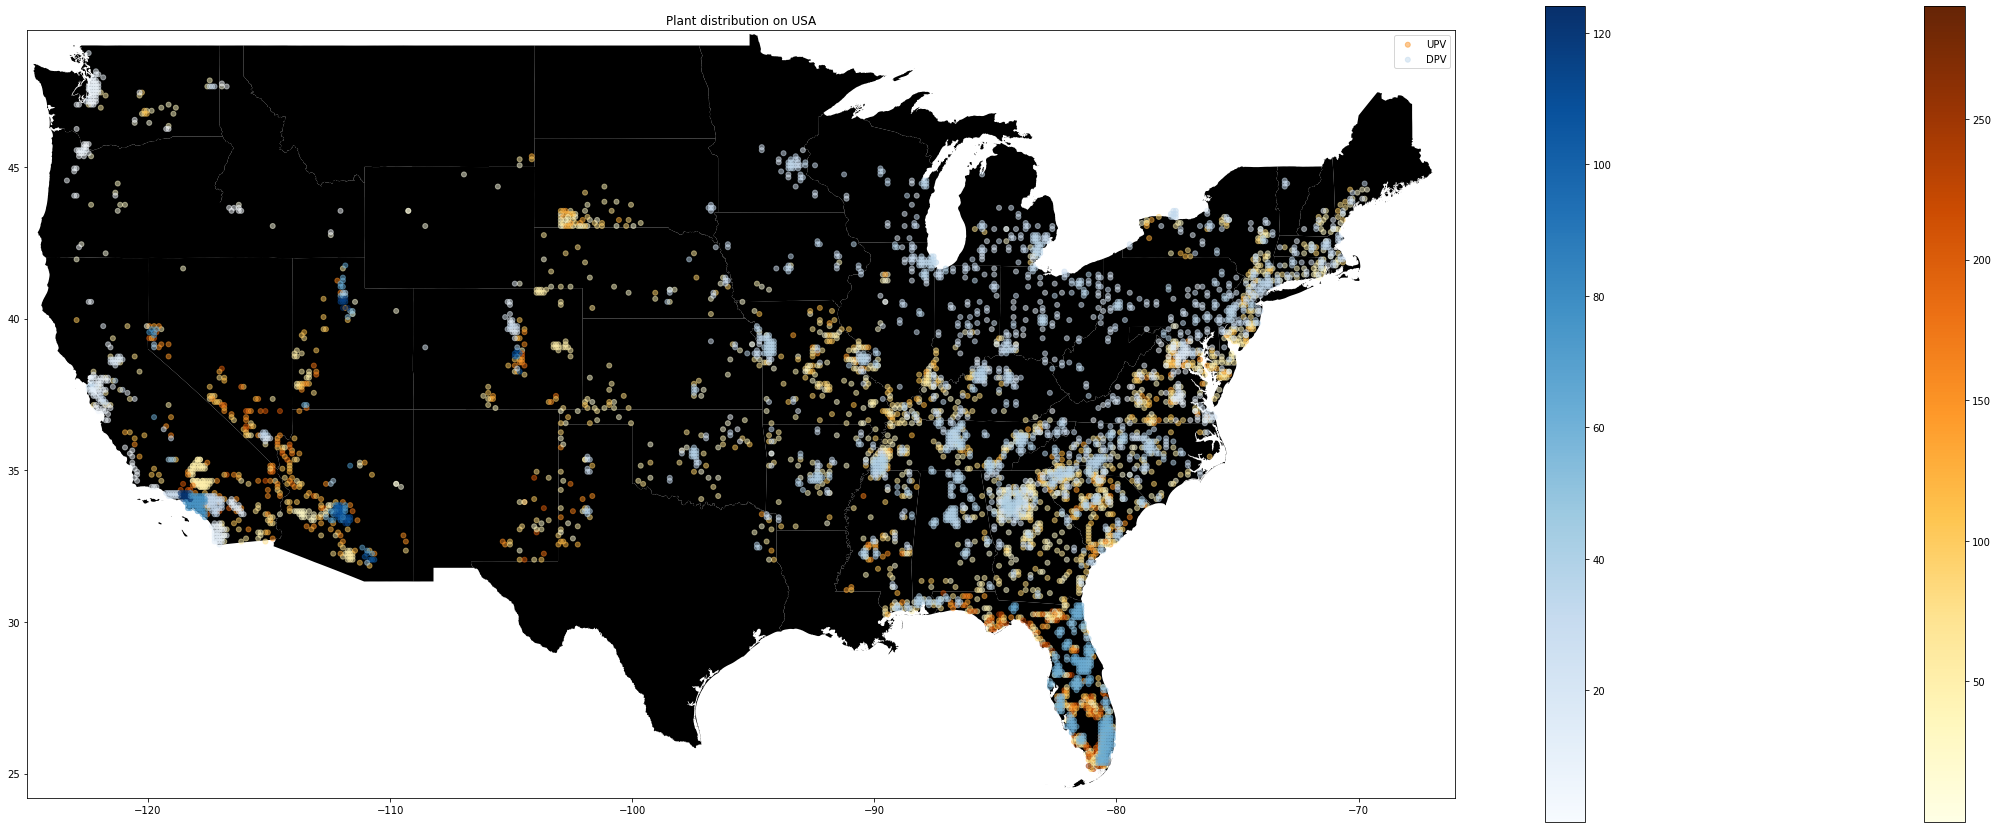

In [14]:
#mapa con las plantas de tipo DPV y UPV.
#BBox = (-120.00, -115.00, 32.5, 35)

fig,ax = plt.subplots(figsize = (40,15))
usa_map.plot(ax = ax, alpha = 1, color='black')
ax.set_title('Plant distribution on USA')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
power = geo_data_UPV['Power (MW)'].astype('float64')
geo_data_UPV.plot(ax = ax, markersize = 25, column = power, c = power, cmap="YlOrBr" ,marker='o', label = 'UPV', alpha = 0.5 ,legend=True)
power2 = geo_data_DPV['Power (MW)'].astype('float64')
geo_data_DPV.plot(ax = ax, markersize = 25, column = power2, c = power2, cmap="Blues" ,marker='o', label = 'DPV', alpha = 0.5 ,legend=True)
plt.legend()
plt.show()



In [15]:
#plants coordinates segmentation
geo_points = geo_data_UPV.geometry.values
points = [ np.array((geom.xy[0][0], geom.xy[1][0])) for geom in geo_points ]

Segmentation with K means


In [16]:
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()

In [17]:
kmeans = KMeans(n_clusters = 50, init ='k-means++')
kmeans.fit(points) # Compute k-means clustering.
geo_data_UPV['cluster_label_kmeans'] = kmeans.fit_predict(points)
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(points) # Labels of each point
geo_data_UPV.head(10)

,Latitude,Longitude,Power (MW),Technology,File_name,geometry,cluster_label_kmeans
0,37.65,-113.65,150,UPV,Actual_37.65_-113.65_2006_UPV_150MW_5_Min.csv,POINT (-113.65000 37.65000),34
1,25.95,-80.75,232,UPV,Actual_25.95_-80.75_2006_UPV_232MW_5_Min.csv,POINT (-80.75000 25.95000),49
2,35.75,-77.65,40,UPV,Actual_35.75_-77.65_2006_UPV_40MW_5_Min.csv,POINT (-77.65000 35.75000),2
3,38.25,-79.05,15,UPV,Actual_38.25_-79.05_2006_UPV_15MW_5_Min.csv,POINT (-79.05000 38.25000),33
4,34.55,-79.95,48,UPV,Actual_34.55_-79.95_2006_UPV_48MW_5_Min.csv,POINT (-79.95000 34.55000),2
5,26.45,-80.15,203,UPV,Actual_26.45_-80.15_2006_UPV_203MW_5_Min.csv,POINT (-80.15000 26.45000),38
6,38.35,-76.55,30,UPV,Actual_38.35_-76.55_2006_UPV_30MW_5_Min.csv,POINT (-76.55000 38.35000),31
7,37.35,-105.85,125,UPV,Actual_37.35_-105.85_2006_UPV_125MW_5_Min.csv,POINT (-105.85000 37.35000),42
8,37.55,-105.95,100,UPV,Actual_37.55_-105.95_2006_UPV_100MW_5_Min.csv,POINT (-105.95000 37.55000),42
9,38.85,-113.65,50,UPV,Actual_38.85_-113.65_2006_UPV_50MW_5_Min.csv,POINT (-113.65000 38.85000),34


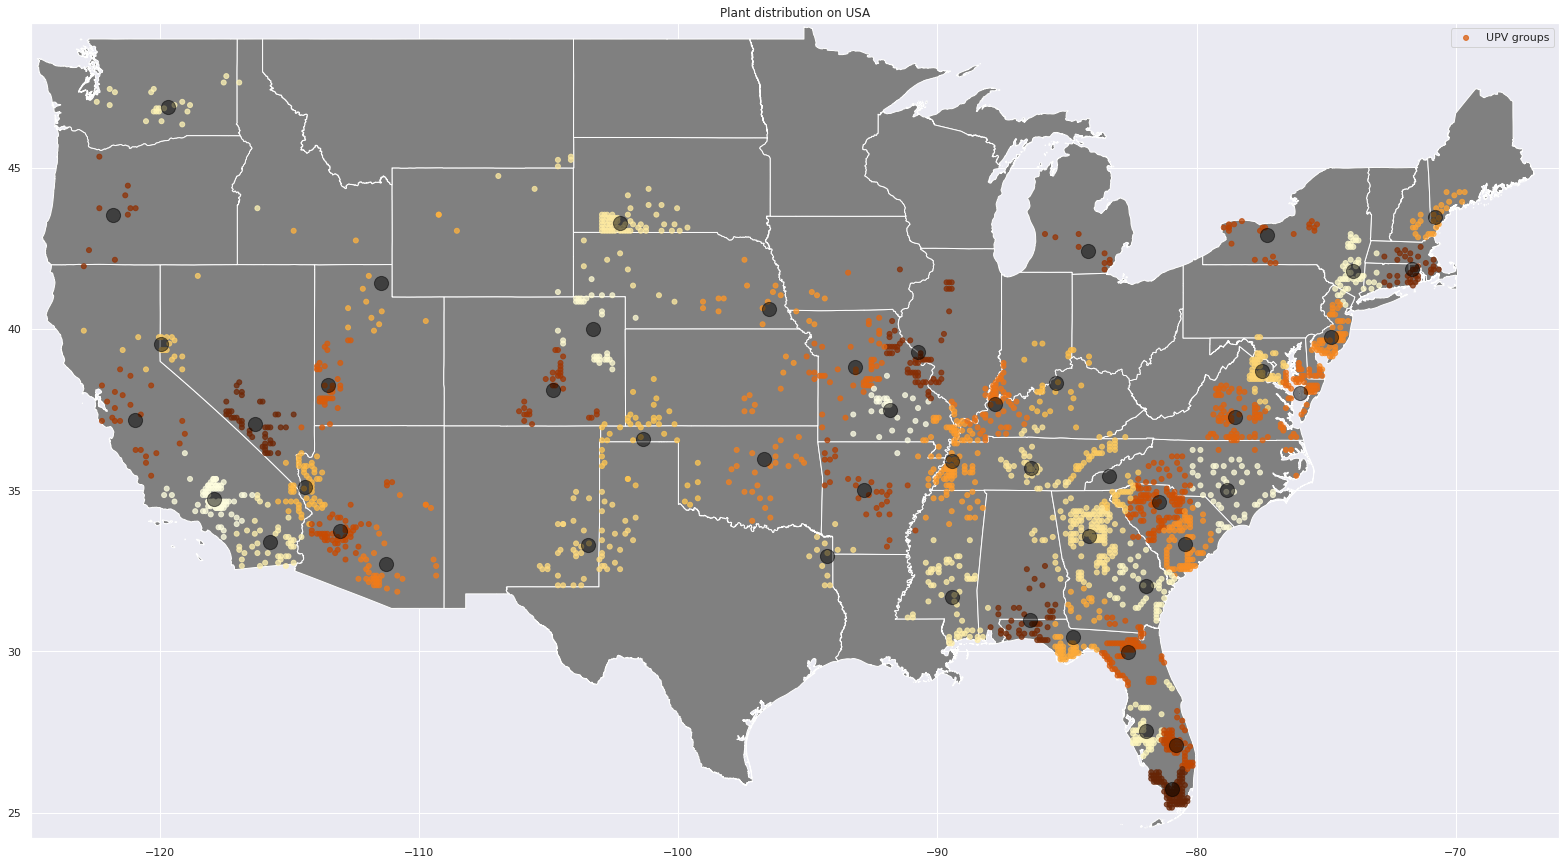

In [20]:
#mapa con las plantas de tipo UPV con el color de acuerdo a su segmentación.

fig,ax = plt.subplots(figsize = (40,15))
usa_map.plot(ax = ax, alpha = 1, color='gray')
ax.set_title('Plant distribution on USA')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
power = geo_data_UPV['Power (MW)'].astype('float64')
cluster = geo_data_UPV['cluster_label_kmeans'].astype('float64')
geo_data_UPV.plot(ax = ax, markersize = 25, column = cluster, c = cluster, cmap="YlOrBr" ,marker='o', label = 'UPV groups', alpha = 0.75 )
power2 = geo_data_DPV['Power (MW)'].astype('float64')
#geo_data_DPV.plot(ax = ax, markersize = 25, column = power2, c = power2, cmap="Blues" ,marker='o', label = 'DPV', alpha = 0.5 ,legend=True)
plt.scatter(centers_df.center_long, centers_df.center_lat, c='black', s=200, alpha=0.5)
plt.legend()
plt.show()

In [19]:
centers_df = pd.DataFrame(centers, columns = ['center_long','center_lat'])
centers_df.head(3)

,center_long,center_lat
0,-91.83000,37.486667
1,-117.92037,34.720370
2,-78.81875,34.995833


-----

In [21]:
us_cities = pd.read_csv('uscities.csv')
us_cities = us_cities.filter(['city','state_id','lat','lng'], axis=1)
us_cities = us_cities.rename(columns={"lat": "Latitude", "lng": "Longitude"})
us_cities.head()

,city,state_id,Latitude,Longitude
0,New York,NY,40.6943,-73.9249
1,Los Angeles,CA,34.1139,-118.4068
2,Chicago,IL,41.8373,-87.6862
3,Miami,FL,25.7839,-80.2102
4,Dallas,TX,32.7936,-96.7662


In [22]:
#nearest city from segmentation centers

cities = []
states = []
lat = []
lng = []
for x1,y1 in zip(centers_df.center_long.values, centers_df.center_lat.values):
    distances = []
    for x2,y2 in zip(us_cities.Longitude.values, us_cities.Latitude.values):
        a = np.array([x1,y1])
        b = np.array([x2,y2])
        distances.append(np.linalg.norm(a-b))
    
    ind = distances.index(min(distances))
    cities.append(us_cities.values[ind][0])
    states.append(us_cities.values[ind][1])
    lat.append(us_cities.values[ind][2])
    lng.append(us_cities.values[ind][3])

#adds to dataframe data from nearest city to the centroid
centers_df['Nearest_city'] = cities
centers_df['State_near_city'] = states
centers_df['city_long'] = lng
centers_df['city_lat'] = lat

In [23]:
centers_df.head()

,center_long,center_lat,Nearest_city,State_near_city,city_long,city_lat
0,-91.830000,37.486667,Licking,MO,-91.8618,37.4993
1,-117.920370,34.720370,Lake Los Angeles,CA,-117.8339,34.6097
2,-78.818750,34.995833,Vander,NC,-78.7888,35.0347
3,-103.304545,40.010606,Akron,CO,-103.2202,40.1635
4,-73.965686,41.816667,Staatsburg,NY,-73.9256,41.8553


In [30]:


def closest_centroid(geo_data_XPV_labeled, centers_df, coords = (-120,25)):
    
    distances = []
    for x1,y1 in zip(centers_df.center_long.values, centers_df.center_lat.values):

        a = np.array([coords[0], coords[1]])
        b = np.array([x1,y1])
        distances.append(np.linalg.norm(a-b))

    ind = distances.index(min(distances))
    lng = centers_df['center_long'][ind]
    lat = centers_df['center_lat'][ind]

    return ind, lng, lat

def cluster_group(index, geo_data_XPV_labeled):
    
    cluster_group_meta = geo_data_XPV_labeled.loc[geo_data_XPV_labeled['cluster_label_kmeans'] == index] 
    return cluster_group_meta.reset_index(drop=True)


In [31]:
ind, long, latit = closest_centroid(geo_data_UPV, centers_df, coords = (-90,31))

In [32]:
cluster_group_meta = cluster_group(ind, geo_data_UPV)

In [33]:
cluster_group_meta

,Latitude,Longitude,Power (MW),Technology,File_name,geometry,cluster_label_kmeans
0,32.25,-89.45,151,UPV,Actual_32.25_-89.45_2006_UPV_151MW_5_Min.csv,POINT (-89.45000 32.25000),9
1,30.55,-89.25,118,UPV,Actual_30.55_-89.25_2006_UPV_118MW_5_Min.csv,POINT (-89.25000 30.55000),9
2,31.05,-91.15,134,UPV,Actual_31.05_-91.15_2006_UPV_134MW_5_Min.csv,POINT (-91.15000 31.05000),9
3,32.45,-89.95,134,UPV,Actual_32.45_-89.95_2006_UPV_134MW_5_Min.csv,POINT (-89.95000 32.45000),9
4,30.55,-88.95,101,UPV,Actual_30.55_-88.95_2006_UPV_101MW_5_Min.csv,POINT (-88.95000 30.55000),9
5,30.65,-88.35,10,UPV,Actual_30.65_-88.35_2006_UPV_10MW_5_Min.csv,POINT (-88.35000 30.65000),9
6,32.05,-90.15,151,UPV,Actual_32.05_-90.15_2006_UPV_151MW_5_Min.csv,POINT (-90.15000 32.05000),9
7,30.65,-88.65,34,UPV,Actual_30.65_-88.65_2006_UPV_34MW_5_Min.csv,POINT (-88.65000 30.65000),9
8,32.45,-90.35,50,UPV,Actual_32.45_-90.35_2006_UPV_50MW_5_Min.csv,POINT (-90.35000 32.45000),9
9,32.95,-89.25,103,UPV,Actual_32.95_-89.25_2006_UPV_103MW_5_Min.csv,POINT (-89.25000 32.95000),9
